In [1]:
#Reading in the required libraries
from PIL import Image
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img

from skimage import io
from skimage import color
from skimage.transform import resize

%matplotlib inline

In [2]:
#Reading in the CSV
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")
print("Training Data:",train_df.shape)
print("Test Data    :",test_df.shape)
train_df.head()

Training Data: (6800, 2)
Test Data    : (200, 2)


,ID,RESULT
0,Tuberculosis-1017,1
1,Normal-2255,0
2,Tuberculosis-3366,1
3,Normal-246,0
4,Normal-1252,0


In [3]:
# Reading the image, converting it to grayscale and reducing the size to 128 x 128  
num_images         = 6800
im_size            = 128
path_to_img_folder = "Images"

N = train_df.shape[0]
x_train = np.empty((num_images, im_size, im_size), dtype=np.float32)

for i, image_id in enumerate(train_df['ID']):
    img = color.rgb2gray(io.imread(f'{path_to_img_folder}/{image_id}.png'))
    x_train[i, :, :] = resize(img, (im_size, im_size))

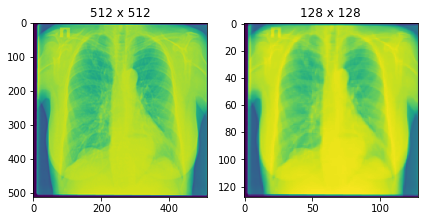

In [4]:
#Plotting the difference in images after reducing the pixels
id = train_df['ID'][0]
fig, (ax1, ax2) = plt.subplots(1, 2)
    
ax1.imshow(io.imread(f'{path_to_img_folder}/{id}.png'))
ax1.set_title("512 x 512")
ax2.imshow(x_train[0,:,:])
ax2.set_title("128 x 128")
fig.tight_layout()

In [5]:
#Splitting the images to 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(x_train, train_df['RESULT'], test_size=0.20, random_state=0)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(5440, 128, 128)
(1360, 128, 128)
(5440,)
(1360,)
